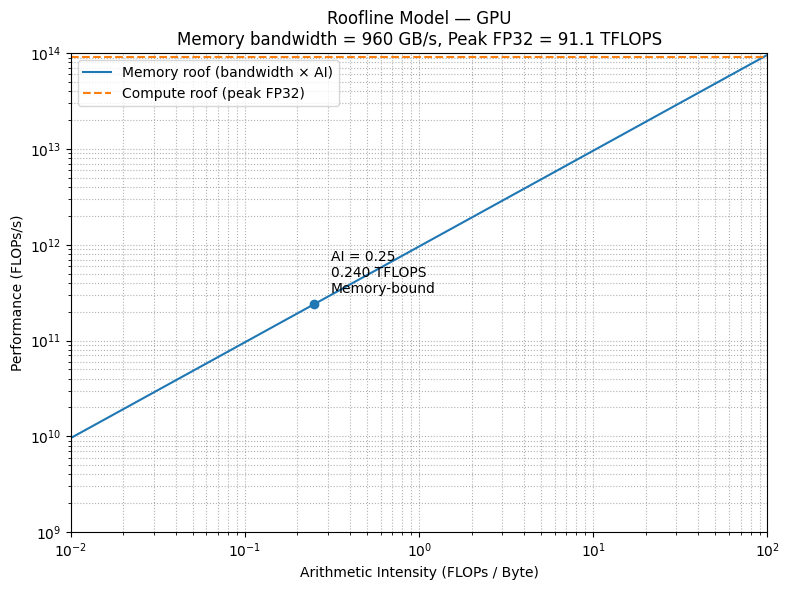

Arithmetic intensity = 0.25 FLOPs/Byte
Memory-limited performance = 2.400e+11 FLOP/s = 0.240 TFLOPS
Compute-limited peak = 9.110e+13 FLOP/s = 91.100 TFLOPS


In [ ]:
# Creating a roofline plot for the GPU and marking AI=1 point.
import numpy as np
import matplotlib.pyplot as plt

bandwidth = 960e9  # bytes/s (960 GB/s)
compute = 91.1e12  # FLOP/s (91.1 TFLOPS)
ai_point1 = 0.25
ai_point2 = 0.25 * 32

AI = np.logspace(-2, 2, 400)  # from 0.01 to 100 FLOPs/Byte
mem_perf = bandwidth * AI
compute_perf = np.full_like(AI, compute)

plt.figure(figsize=(8,6))
plt.loglog(AI, mem_perf, label='Memory roof (bandwidth × AI)')
plt.loglog(AI, compute_perf, linestyle='--', label='Compute roof (peak FP32)')

plt.scatter([ai_point1], [bandwidth*ai_point1])
plt.annotate(
    f'AI = {ai_point1}\n{(bandwidth*ai_point1)/1e12:.3f} TFLOPS\nMemory-bound',
    (ai_point1, bandwidth*ai_point1),
    textcoords="offset points", xytext=(12,8), ha='left'
)

plt.scatter([ai_point2], [bandwidth*ai_point2])
plt.annotate(
    f'AI = {ai_point2}\n{(bandwidth*ai_point2)/1e12:.3f} TFLOPS\nMemory-bound',
    (ai_point2, bandwidth*ai_point2),
    textcoords="offset points", xytext=(12,8), ha='left'
)
plt.xlabel('Arithmetic Intensity (FLOPs / Byte)')
plt.ylabel('Performance (FLOPs/s)')
plt.title('Roofline Model — GPU\nMemory bandwidth = 960 GB/s, Peak FP32 = 91.1 TFLOPS')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.ylim(1e9, 1e14)
plt.xlim(1e-2, 1e2)
plt.tight_layout()

# Save the figure to a file so you can download it
# output_path = '/mnt/data/roofline.png'
# plt.savefig(output_path)
plt.show()

# Print summary numbers for clarity
mem_limited_perf = bandwidth * ai_point1
print(f"Arithmetic intensity = {ai_point1} FLOPs/Byte")
print(f"Memory-limited performance = {mem_limited_perf:.3e} FLOP/s = {mem_limited_perf/1e12:.3f} TFLOPS")
print(f"Compute-limited peak = {compute:.3e} FLOP/s = {compute/1e12:.3f} TFLOPS")

